<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#Global-congruence" data-toc-modified-id="Global-congruence-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Global congruence</a></span><ul class="toc-item"><li><span><a href="#PH85" data-toc-modified-id="PH85-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PH85</a></span></li><li><span><a href="#Mantel" data-toc-modified-id="Mantel-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Mantel</a></span></li><li><span><a href="#cospeciation" data-toc-modified-id="cospeciation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>cospeciation</a></span></li><li><span><a href="#Procrustes" data-toc-modified-id="Procrustes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Procrustes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-5.4.0.1"><span class="toc-item-num">5.4.0.1&nbsp;&nbsp;</span>Saving results</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Compare the genome-based GTDB phylogeny versus the traitar trait dendrogam
* Methods for comparing:
  * global
    * PH85 & `Kuhner and Felsenstein`

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp/'

# genome phylogeny
gen_phy_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/phylogeny/ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk'

# traitar phenotypes
## majority votes
trt_jac_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/predictions_flat_majority-votes_combined_jaccard_rn.nwk'
## single votes
trt_bray_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/predictions_flat_single-votes_combined_bray_rn.nwk'

# GTDBr89 genome metadata
meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# params
threads = 8

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(vegan)
library(LeyLabRMisc)

In [4]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp/ 


In [26]:
#library(openblasctl)
#openblas_set_num_threads(4)

In [27]:
# running on the cluster
library(future)
library(future.batchtools)
library(purrr)
library(furrr)
options(future.wait.interval = 2.0)

# Load

In [28]:
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
meta = Fread(meta_file) %>%
    select.(ncbi_genbank_assembly_accession, accession, 
            ncbi_organism_name, gtdb_taxonomy) %>%
    rename.('GTDB_accession' = accession) %>%
    separate.(gtdb_taxonomy, tax_levs, sep=';') 

meta %>% unique_n('NCBI accessions', ncbi_genbank_assembly_accession)
meta

No. of unique NCBI accessions: 23360 


ncbi_genbank_assembly_accession,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,GB_GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395
GCA_002791595.1,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [29]:
# phylogeny
gen_phy = read.tree(gen_phy_file)
gen_phy


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Halorubrum_sp000296615, s__Halorubrum_distributum, s__Halorubrum_trapanicum, s__Halorubrum_tropicale, s__Halorubrum_coriense, s__Halorubrum_ezzemoulense, ...
Node labels:
  100.0, d__Archaea100.0, 97.0, 99.0, 100.0, 100.0-p__Halobacterota, ...

Rooted; includes branch lengths.

In [30]:
# jaccard
trt_jac = read.tree(trt_jac_file)
trt_jac


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Mikella_endobia, s__Prochlorococcus_B_sp003284185, s__Prochlorococcus_A_sp003282425, s__Eperythrozoon_A_wenyonii_A, s__GN02-872_sp003260325, s__SZUA-486_sp003251635, ...

Rooted; includes branch lengths.

In [31]:
# bray-curtis
trt_bray = read.tree(trt_bray_file)
trt_bray


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Mikella_endobia, s__Prochlorococcus_B_sp003284185, s__Sulcia_muelleri_B, s__SW-4-49-11_sp003021915, s__GCA-002782345_sp002782345, s__UBA6534_sp002687905, ...

Rooted; includes branch lengths.

## Checks

In [32]:
overlap(gen_phy$tip.label, trt_jac$tip.label)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [33]:
overlap(gen_phy$tip.label, trt_bray$tip.label)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


# Global congruence

## PH85

In [34]:
# genome-phy versus genome-phy (neg. control)
genPhy_genPhy_PH85 = dist.topo(unroot(gen_phy), 
                               unroot(gen_phy), method = "PH85")
genPhy_genPhy_PH85

      tree1
tree2     0

In [35]:
# genome-phy versus trait-majority
genPhy_trtJac_PH85 = dist.topo(unroot(gen_phy), 
                               unroot(trt_jac), method = "PH85")
genPhy_trtJac_PH85

      tree1
tree2 44380

In [36]:
# genome-phy versus trait-single
genPhy_trtBray_PH85 = dist.topo(unroot(gen_phy), 
                                unroot(trt_bray), method = "PH85")
genPhy_trtBray_PH85

      tree1
tree2 41596

In [37]:
# trait-majority versus trait-single
trtJac_trtBray_PH85 = dist.topo(unroot(trt_jac), 
                                unroot(trt_bray), method = "PH85")
trtJac_trtBray_PH85

      tree1
tree2 40990

## Mantel

In [41]:
#' function to force tree structure
coph <- function(x, path = FALSE) {
  if (is.null(attr(x, "order")) || attr(x, "order") == "cladewise")
    x <- reorder(x, "postorder")
  el <- x$edge.length
  if (path) el <- rep(1.0, nrow(x$edge))
  nTips <- as.integer(length(x$tip.label))
  nNode <- as.integer(x$Nnode)
  dm <- cophenetic_cpp(x$edge, as.double(el), nTips, nNode)
  attr(dm, "Size") <- nTips
  attr(dm, "Labels") <- x$tip.label
  attr(dm, "Diag") <- FALSE
  attr(dm, "Upper") <- FALSE
  class(dm) <- "dist"
  dm
}

In [42]:
# converting phylogeny to ultrametric dendrogram to distance matrix
force_ultra = function(x){
    phytools::force.ultrametric(x,  method=c("extend"))
}

phy2cophenetic = function(phy){
  x = phy %>%
    unroot %>%
    multi2di %>%
    compute.brlen(1) %>%
    force_ultra %>%
    cophenetic 
}

# test
phy2cophenetic(rtree(10)) %>% dim

[1] 10 10

In [64]:
# phylogeny to matrix
gen_phy_mtx = phy2cophenetic(gen_phy)
gen_phy_mtx %>% dim

ERROR: Error in dist.nodes(x): long vectors (argument 7) are not supported in .C


In [55]:
dist.nodes <- function(x){
    x <- reorder(x) # required for the C code
    n <- Ntip(x)
    m <- x$Nnode
    nm <- as.numeric(n + m)

    d <- .C("dist_nodes", 
            as.integer(n), as.integer(m),
            as.integer(x$edge[, 1] - 1L), as.integer(x$edge[, 2] - 1L),
            as.double(x$edge.length), as.integer(Nedge(x)),
            double(nm * nm), NAOK = TRUE)[[7]]
    dim(d) <- c(nm, nm)
    dimnames(d) <- list(1:nm, 1:nm)
    d
}

cophenetic.phylo <- function(x){
    n <- length(x$tip.label)
    ans <- dist.nodes(x)[1:n, 1:n]
    dimnames(ans)[1:2] <- list(x$tip.label)
    ans
}

In [ ]:
# mantel
genPhy_trtJac_mantel = ape::mantel.test(phy2cophenetic(gen_phy), 
                                        phy2cophenetic(trt_jac),
                                        nperm=9)
genPhy_trtJac_mantel

## cospeciation

* Testing if the genome phylogeny & trait dendrogram are significantly congruent

In [43]:
# genome-phylo versus traits-majority-votes
genPhy_trtJac_coSpec = phytools::cospeciation(gen_phy, trt_jac, distance=c('RF'),
                                              method=c('permutation'), 
                                              assoc=NULL, nsim=100)

genPhy_trtJac_coSpec


Co-speciation test based on RF distance.
P-value obtained via permutation .

   RF distance: 44380 
   Mean(SD) from null: 46713.7(0.7)
   P-value: 0.009901 


In [44]:
# genome-phylo versus traits-single-votes
genPhy_trtBray_coSpec = phytools::cospeciation(gen_phy, trt_bray, distance=c('RF'),
                                              method=c('permutation'), 
                                              assoc=NULL, nsim=100)

genPhy_trtBray_coSpec


Co-speciation test based on RF distance.
P-value obtained via permutation .

   RF distance: 41596 
   Mean(SD) from null: 46713.5(1)
   P-value: 0.009901 


In [45]:
# traits versus traits
trtBray_trtJac_coSpec = phytools::cospeciation(trt_jac, trt_bray, distance=c('RF'),
                                              method=c('permutation'), 
                                              assoc=NULL, nsim=100)

trtBray_trtJac_coSpec


Co-speciation test based on RF distance.
P-value obtained via permutation .

   RF distance: 40990 
   Mean(SD) from null: 46713.6(0.9)
   P-value: 0.009901 


In [46]:
send_email('http://127.0.0.1:9702/notebooks/ipynb/01_data_explore/05a_phylo_trait_tree_compare.ipynb#')

Sending email to: nyoungblut@tuebingen.mpg.de



## Procrustes

In [47]:
# converting phylogeny to ultrametric dendrogram to distance matrix
force_ultra = function(x){
    phytools::force.ultrametric(x,  method=c("extend"))
}

#' tree to distance matrix
phy2cophenetic = function(phy, tips_to_keep=NULL){
    if(!is.null(tips_to_keep)){
        phy = ape::drop.tip(phy, setdiff(phy$tip.label, tips_to_keep))
    }
    x = phy %>%
        unroot %>%
        multi2di %>%
        cophenetic 
}

# test
x = phy2cophenetic(rtree(10), c('t1', 't2', 't3'))
x

,t3,t2,t1
t3,0.000000,1.866303,2.500295
t2,1.866303,0.000000,3.310658
t1,2.500295,3.310658,0.000000


In [48]:
#' procrustes on subsets of the data
procrustes_perm = function(permID, phy1, phy2, ntaxa=10){
    to_keep = base::sample(phy1$tip.label, ntaxa)
    x = vegan::procrustes(phy2cophenetic(phy1, to_keep), 
                      phy2cophenetic(phy2, to_keep),
                      symmetric=TRUE) %>% 
        residuals %>%
        as.data.frame
    colnames(x) = 'Residuals'
    x$Taxon = rownames(x)
    return(x)
}

In [49]:
# setting cluster resources 
resources = list(h_rt = '24:00:00',
                 h_vmem = '8G',
                 threads = '6',
                 conda.env = '/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy')
plan(batchtools_sge, resources=resources, workers=100)

In [21]:
# running permutations on the cluster
nperm = 1000
proc_perms = nperm %>%
    seq %>% as.list() %>%
    future_map(procrustes_perm, phy1=gen_phy, phy2=trt_jac, ntaxa=5000) %>%
    data.table::rbindlist(use.names=TRUE, idcol='perm')
                
proc_perms

perm,Residuals,Taxon
<int>,<dbl>,<chr>
1,0.01407830,GCA_900111935.1
1,0.01348891,GCA_001564205.1
⋮,⋮,⋮
1000,0.01987195,GCA_003153935.1
1000,0.01259310,GCA_900321865.1


#### Saving results

In [50]:
# file
proc_perms_file = file.path(work_dir, 'tree-trait_procrustes_perms.qs')
proc_perms_file 

[1] "/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//tree-trait_procrustes_perms.qs"

In [22]:
# saving results
qs::qsave(proc_perms, proc_perms_file, nthreads=threads)
cat('File written:', proc_perms_file, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//tree-trait_procrustes_perms.qs 


In [51]:
# re-loading results
proc_perms = qs::qread(proc_perms_file, nthreads=threads)
proc_perms %>% class

[1] "data.table" "data.frame"

In [31]:
#send_email('http://127.0.0.1:9702/notebooks/ipynb/01_data_explore/05_phylo_trait_tree_compare.ipynb')

In [24]:
# #' pulling out procrustes residuals
# resid_to_df = function(x){
#     x = x %>% residuals %>% as.data.frame
#     colnames(x) = 'Residuals'
#     x$Taxon = rownames(x)
#     return(x)
# }

# # processing permutations in parallel
# doParallel::registerDoParallel(threads)
# proc_perms_res = proc_perms %>%
#     plyr::llply(resid_to_df, .parallel=TRUE) %>%
#     data.table::rbindlist(use.names=TRUE, idcol='Permutation') %>%
#     dt_summarize(n = length(Residuals),
#                  min_res = min(Residuals),
#                  mean_res = mean(Residuals),
#                  sd_res = sd(Residuals),
#                  max_res = max(Residuals),
#                  by=list(Taxon))
    
# proc_perms_res

In [52]:
# checking key overlap
overlap(proc_perms, meta, Taxon, ncbi_genbank_assembly_accession)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [67]:
# adding genome info
proc_perms_j = proc_perms %>%
    summarize.(n = length(Residuals),
               min_res = min(Residuals),
               mean_res = mean(Residuals),
               sd_res = sd(Residuals),
               max_res = max(Residuals),
               .by=c(Taxon)) %>%
    inner_join.(meta %>% rename.('Taxon' = ncbi_genbank_assembly_accession), 
                by=c('Taxon'))
proc_perms_j

Taxon,n,min_res,mean_res,sd_res,max_res,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,209,0.01091551,0.01303596,0.0008434425,0.01505368,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,233,0.01134826,0.01314972,0.0008587319,0.01578195,GB_GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,208,0.008249037,0.009307001,0.0002977611,0.009987375,GB_GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395
GCA_002791595.1,191,0.008004379,0.009052962,0.0003552835,0.009735034,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


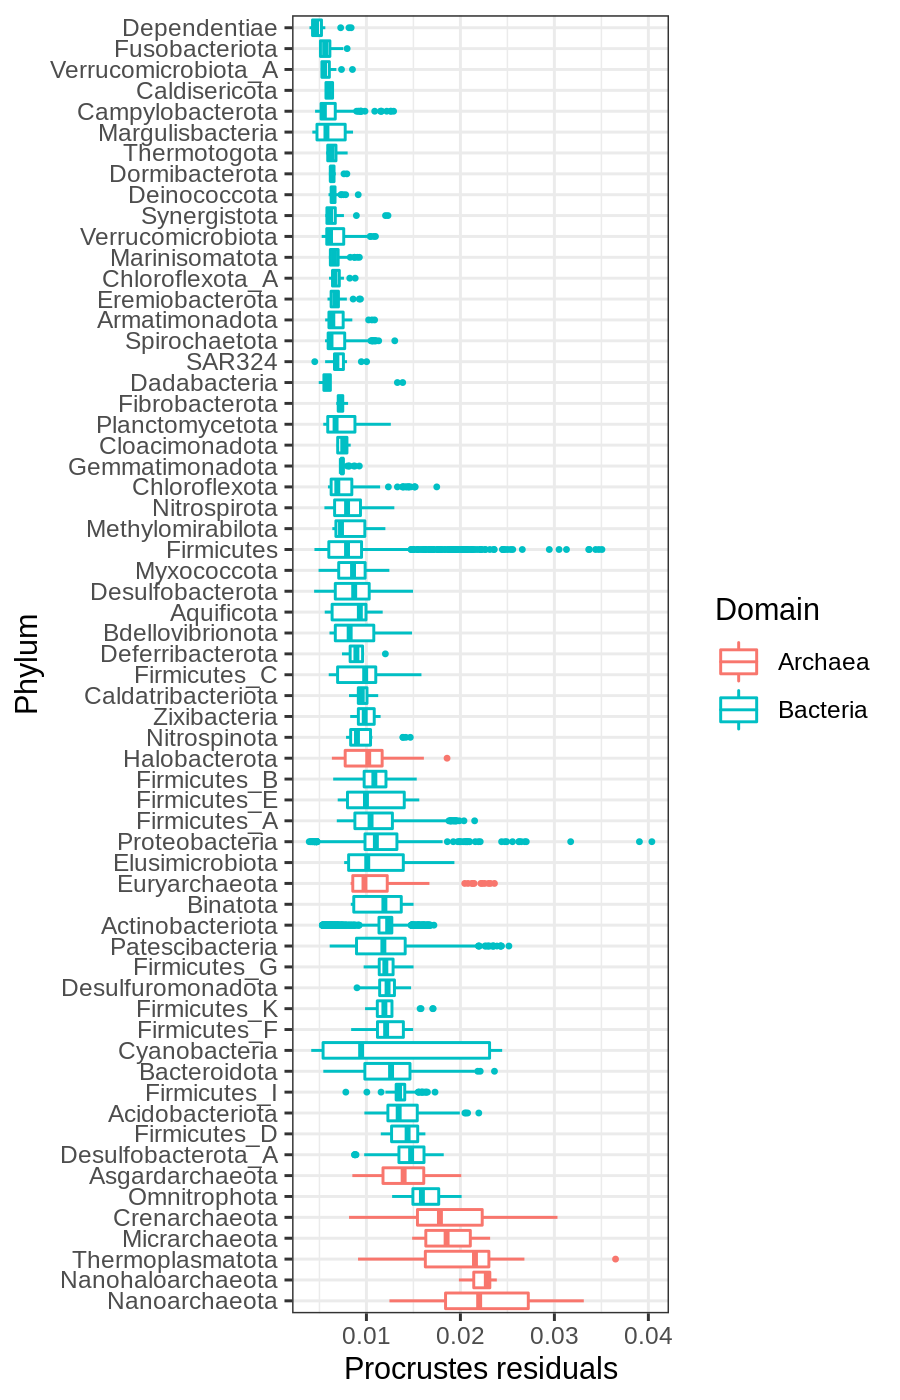

In [77]:
# summarizing
proc_perms_j_s = proc_perms_j %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum)) %>%
    mutate.(phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 10) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

## plotting
p = proc_perms_j_s %>%
    ggplot(aes(Phylum, mean_res, color=Domain)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(y='Procrustes residuals') +
    theme_bw() +
    coord_flip()
p.dims(4.5,7)
plot(p)

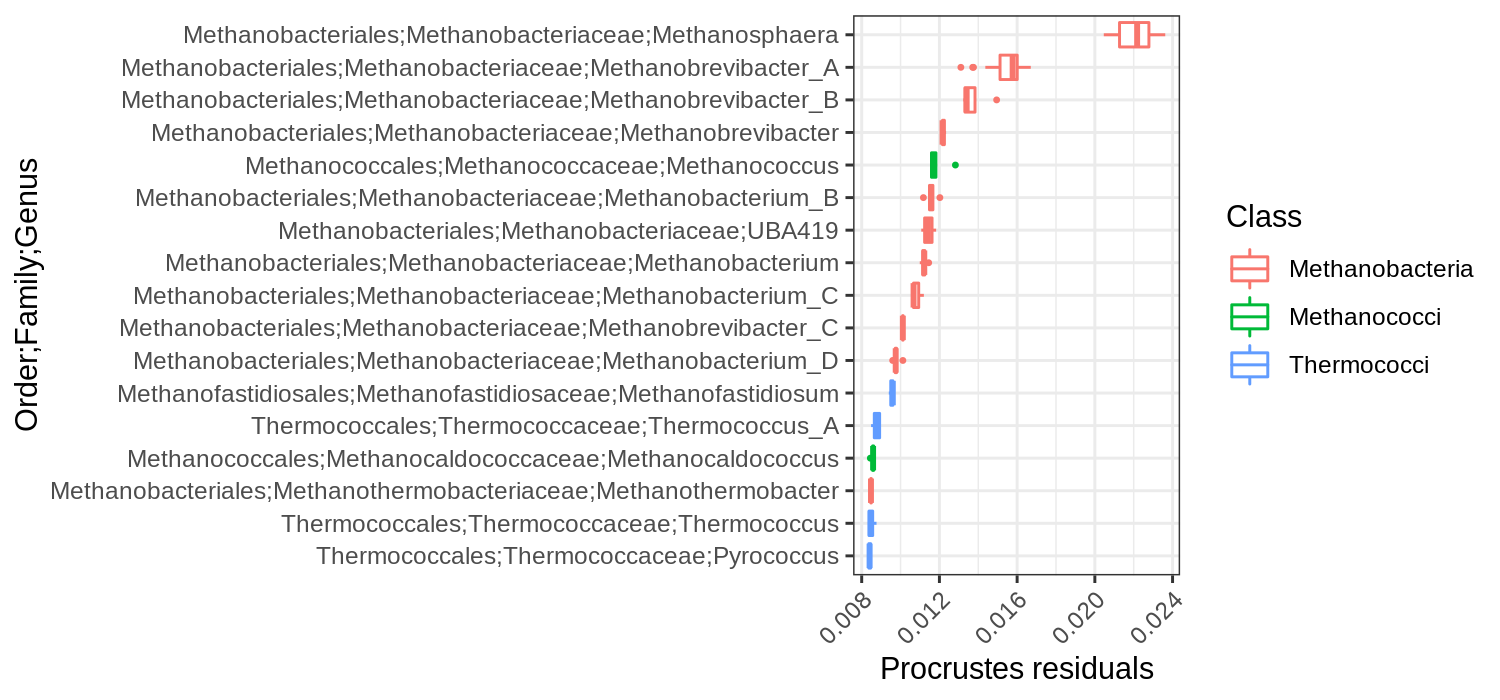

In [78]:
# plotting
p = proc_perms_j_s %>%
    filter.(Phylum == 'Euryarchaeota') %>%
    mutate.(Taxonomy = paste(Order, Family, Genus, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(Class = gsub('^c__', '', Class),
            tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family;Genus', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(7.5,3.5)
plot(p)

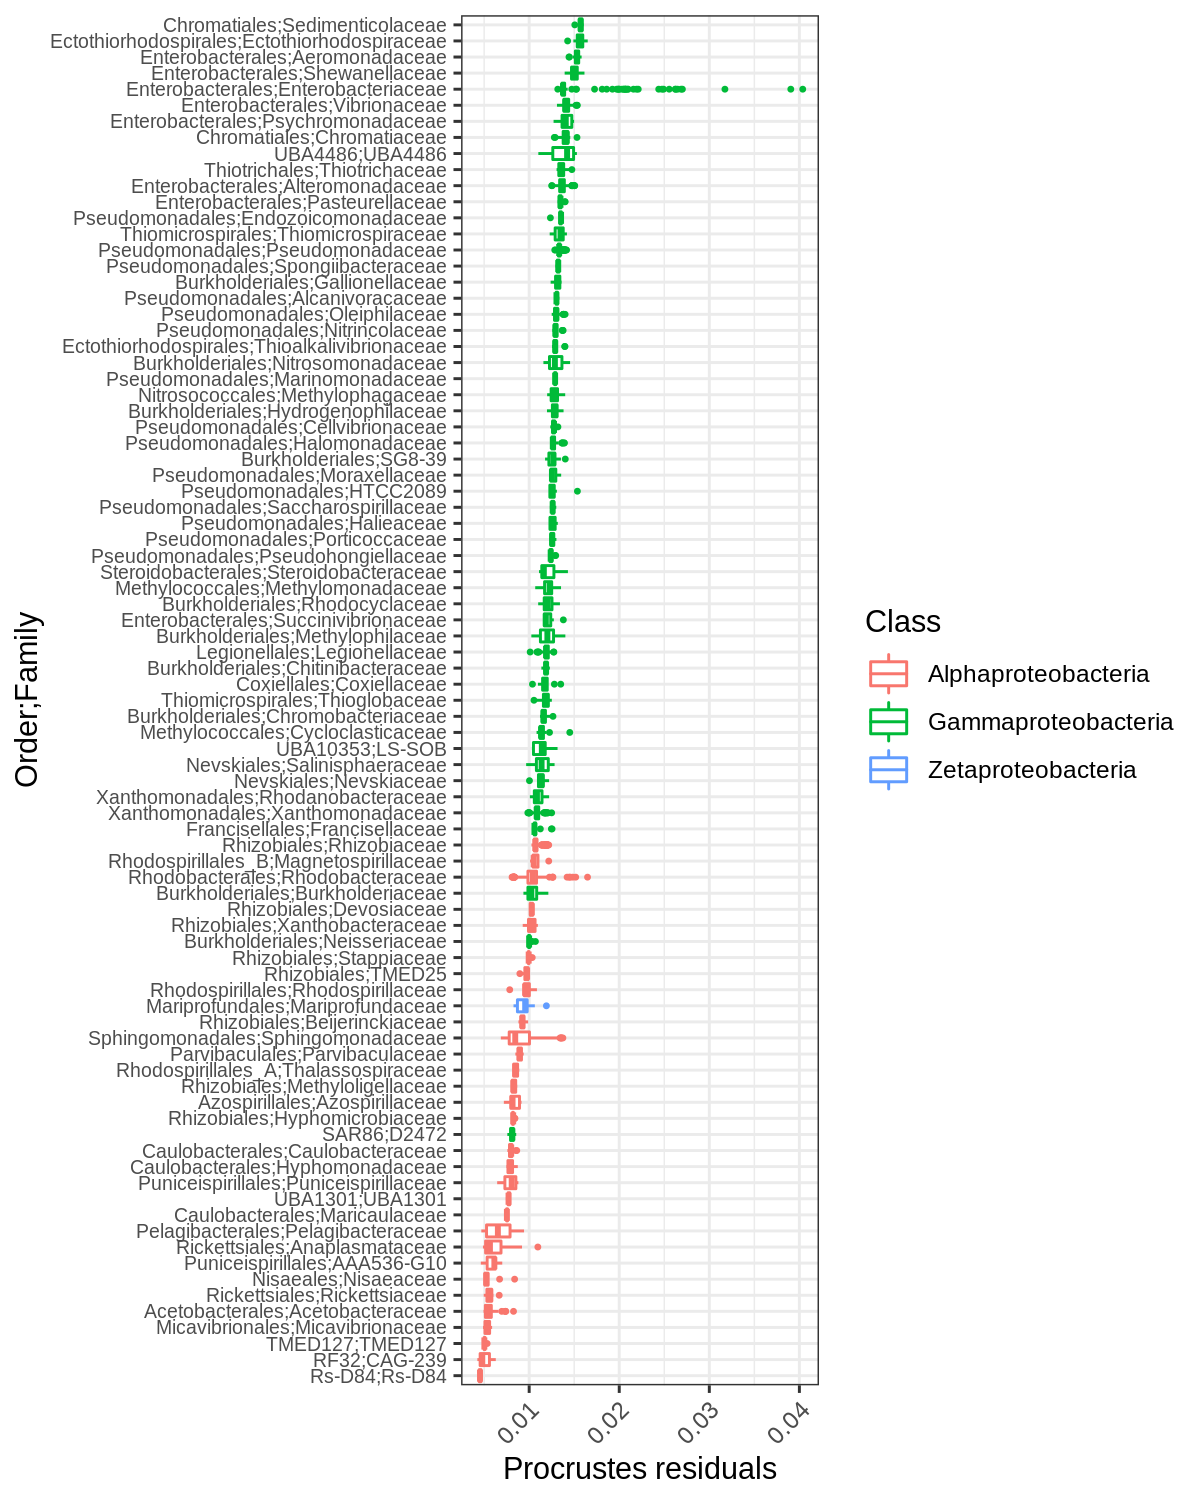

In [79]:
# Proteobacteria
p = proc_perms_j_s %>%
    filter.(Phylum == 'Proteobacteria') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(Class = gsub('^c__', '', Class),
            tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 10) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        axis.text.y = element_text(size=7)
    ) +
    coord_flip()
p.dims(6,7.5)
plot(p)

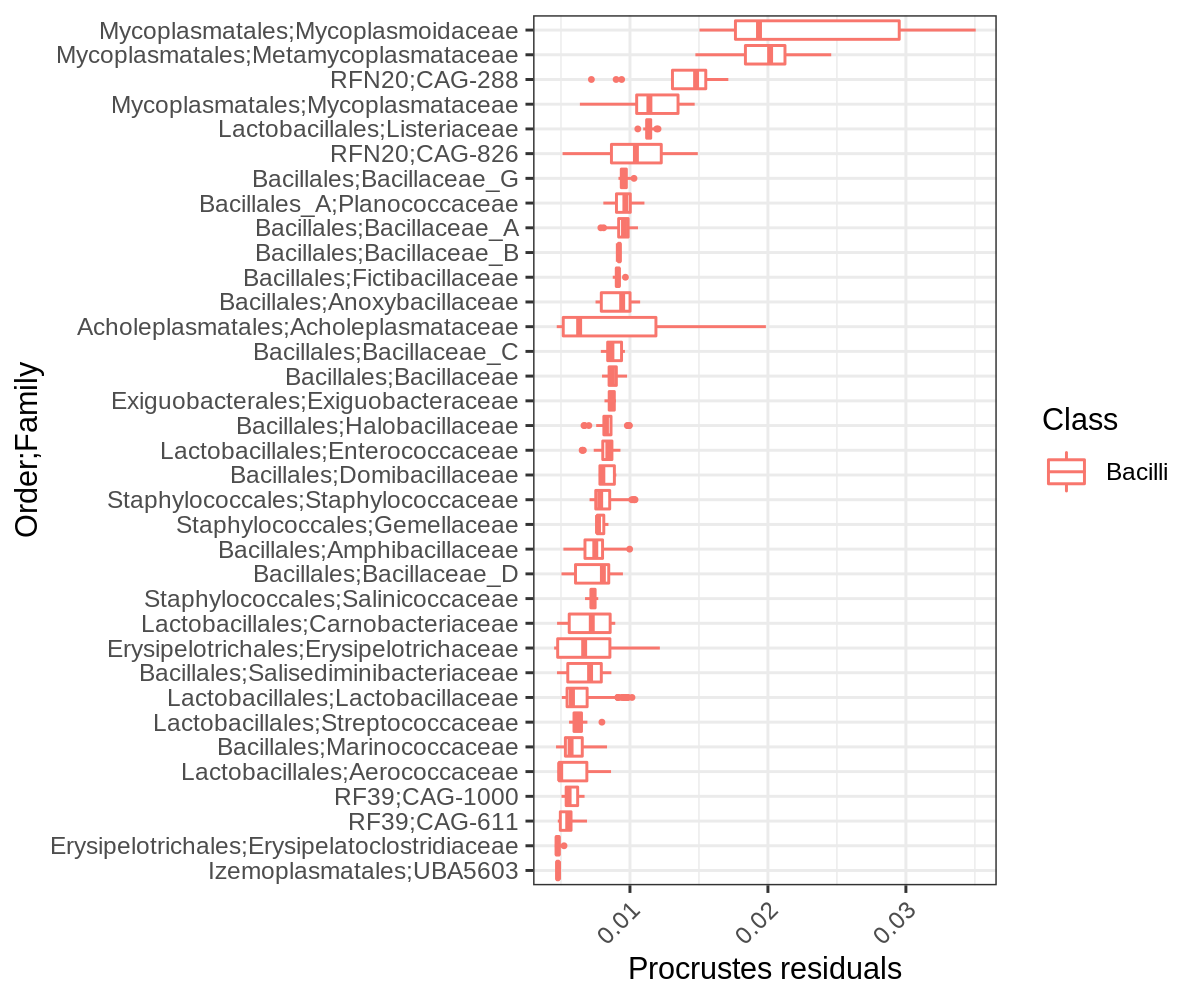

In [80]:
# Firmicutes
p = proc_perms_j_s %>%
    filter.(Phylum == 'Firmicutes') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(Class = gsub('^c__', '', Class),
            tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 10) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(6,5)
plot(p)

# sessionInfo

In [5]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq-phy/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] LeyLabRMisc_0.2.0 vegan_2.5-7       lattice_0.20-45   permute_0.9-5    
 [5] ape_5.5           tidytable_0.6.5   data.table_1.14.2 ggplot2_3.3.5    
 [9] tidyr_1.1.4       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7       pillar_1.6.3